In [23]:
# from zipfile import ZipFile
# file_name = 'archive.zip'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done..")

## Libraries

In [1]:
import cv2
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Preprocessing

In [2]:
d = os.path.join("recycle")
classes = ['Glass', 'Metal', 'Paper', 'Plastic']

In [3]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 2833
Images of label "Metal":	 2688
Images of label "Paper":	 3515
Images of label "Plastic":	 3837


In [4]:
data1=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im1=cv2.resize(im,(224,224))
        data1.append([im1,i])

In [5]:
data=np.array(data1, dtype = object)
import random
random.shuffle(data)

In [6]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [7]:
x=np.array(X)
y=np.array(Y)
print(x.shape,y.shape)

(12873, 224, 224, 3) (12873,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4, stratify=y)

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(9011, 224, 224, 3) (9011,)
(3862, 224, 224, 3) (3862,)


## Build Model

In [10]:
model_denseNet169=tf.keras.applications.densenet.DenseNet169(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [11]:
model_denseNet169.summary()

Model: "densenet169"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 14,307,880 (54.58 MB)

 Trainable params: 14,149,480 (53.98 MB)

 Non-trainable params: 158,400 (618.75 KB)

In [12]:
base_input3=model_denseNet169.layers[1].input
base_output3=model_denseNet169.layers[-2].output

final_output3 = layers.Dense(240)(base_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(128)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(64)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(5, activation='softmax')(final_output3)

In [13]:
new_model_denseNet169 = tf.keras.Model(inputs = base_input3, outputs = final_output3)

In [14]:
new_model_denseNet169.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

## Train Model

In [15]:
result_D=new_model_denseNet169.fit(x_train, y_train, epochs = 5,validation_data=(x_test, y_test))

Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2823s 10s/step - accuracy: 0.7468 - loss: 0.6696 - val_accuracy: 0.9231 - val_loss: 0.2253
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 25664s 91s/step - accuracy: 0.9594 - loss: 0.1275 - val_accuracy: 0.9581 - val_loss: 0.1470
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2581s 9s/step - accuracy: 0.9877 - loss: 0.0447 - val_accuracy: 0.9441 - val_loss: 0.1766
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41017s 146s/step - accuracy: 0.9945 - loss: 0.0269 - val_accuracy: 0.9578 - val_loss: 0.1383
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2979s 11s/step - accuracy: 0.9964 - loss: 0.0151 - val_accuracy: 0.9676 - val_loss: 0.1111


## Accuracy

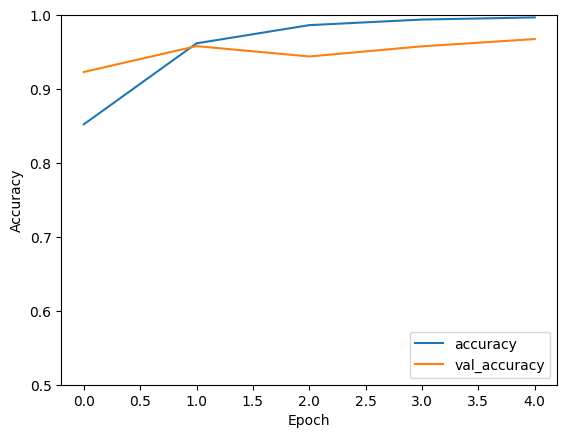

In [16]:
plt.plot(result_D.history['accuracy'], label='accuracy')
plt.plot(result_D.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

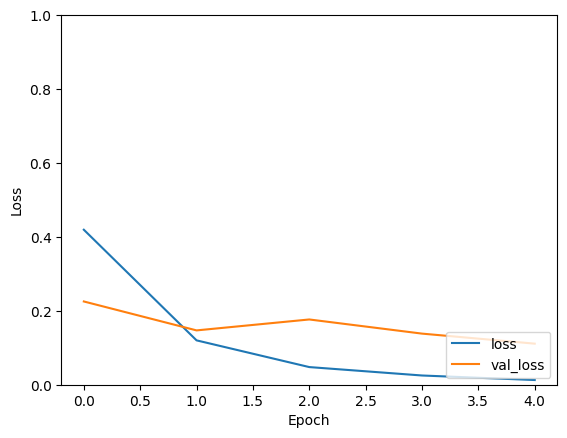

In [17]:
plt.plot(result_D.history['loss'], label='loss')
plt.plot(result_D.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [18]:
loss , accuracy = new_model_denseNet169.evaluate(x_test,y_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 266s 2s/step - accuracy: 0.9684 - loss: 0.1154


In [20]:
y_pred = new_model_denseNet169.predict(x_test).round(2)

121/121 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step


[[2127    6    5    7]
 [  19  887    8    6]
 [   4   12  575   13]
 [  25   10   10  148]]


<Axes: >

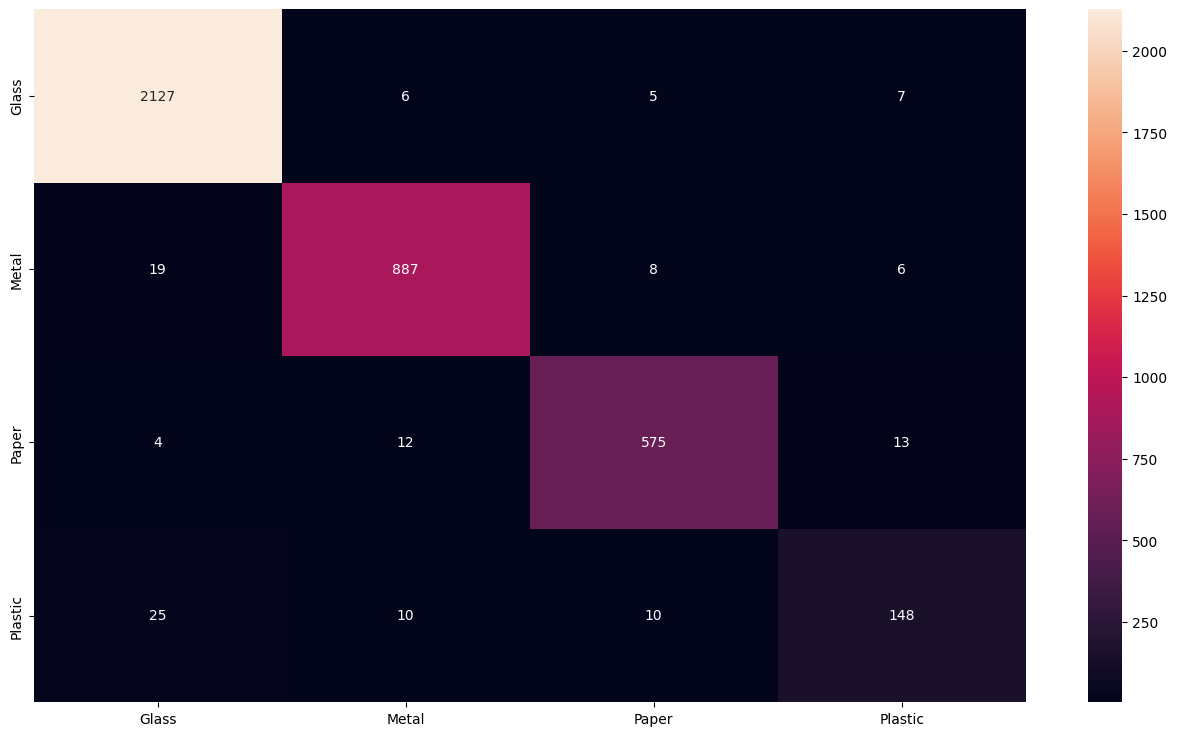

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

In [22]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=classes)
print(cr)

              precision    recall  f1-score   support

       Glass       0.98      0.99      0.98      2145
       Metal       0.97      0.96      0.97       920
       Paper       0.96      0.95      0.96       604
     Plastic       0.85      0.77      0.81       193

    accuracy                           0.97      3862
   macro avg       0.94      0.92      0.93      3862
weighted avg       0.97      0.97      0.97      3862



# Save The Model

In [ ]:
# # serialize model to JSON
# model_json = new_model_denseNet169.to_json()
# with open("DenseNet_model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# new_model_denseNet169.save_weights("DenseNet_model.h5")

## Saving Model In Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# !ls "/content/gdrive/My Drive"

In [21]:
model_json = new_model_denseNet169.to_json()
with open("/content/gdrive/My Drive/Colab Notebooks/DenseNet_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model_denseNet169.save_weights("/content/gdrive/My Drive/Colab Notebooks/DenseNet_model.h5")

In [ ]:
!ls "/content/gdrive/My Drive/Colab Notebooks"